CSV data from https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this line is not really needed, just make plots looks nicer
plt.style.use('bmh')

## 1. Data Overview and Cleaning

In [2]:
# replace the path to your own downloaded csv file path if you are a beginner
df = pd.read_csv("./BankChurners.csv")
print("The shape of current dataset:")
print(df.shape)
df.sample(5)

The shape of current dataset:
(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1240,713735508,Existing Customer,35,M,3,Uneducated,Married,$80K - $120K,Blue,25,...,11927.0,675,11252.0,0.574,1986,36,0.636,0.057,0.000059,0.99994
8338,771067308,Existing Customer,38,F,3,High School,Single,$40K - $60K,Blue,25,...,3040.0,1908,1132.0,0.758,5616,73,0.659,0.628,0.000056,0.99994
3509,788768883,Existing Customer,54,F,0,Unknown,Single,$40K - $60K,Blue,35,...,9231.0,1642,7589.0,0.416,4676,68,0.659,0.178,0.000087,0.99991
666,796343058,Existing Customer,49,F,2,High School,Single,Less than $40K,Blue,43,...,3538.0,0,3538.0,0.481,1265,38,0.462,0.000,0.000054,0.99995
7815,713456583,Existing Customer,45,M,2,High School,Married,$80K - $120K,Silver,37,...,34516.0,1495,33021.0,0.520,3247,70,0.707,0.043,0.000100,0.99990


In [3]:
# those three columns are not useful for analyzing, we need to drop them
to_drop = ["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
for colname in to_drop:
    df.drop(colname, inplace = True, axis = 1)

In [4]:
print("The shape of current dataset:")
print(df.shape)
df.sample(5)

The shape of current dataset:
(10127, 20)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9808,Attrited Customer,34,M,0,Graduate,Divorced,$80K - $120K,Silver,24,1,2,3,34516.0,400,34116.0,0.202,5112,49,0.256,0.012
4866,Attrited Customer,46,F,3,College,Married,Less than $40K,Blue,36,2,3,4,1804.0,0,1804.0,0.537,2077,44,0.419,0.000
294,Existing Customer,45,M,2,College,Single,$60K - $80K,Blue,33,6,3,0,23218.0,1814,21404.0,1.178,1749,37,2.083,0.078
4926,Attrited Customer,41,M,4,Unknown,Single,$80K - $120K,Blue,28,1,2,4,4428.0,0,4428.0,0.865,2331,36,0.286,0.000
1592,Existing Customer,26,F,0,Unknown,Single,Unknown,Blue,13,4,1,2,4395.0,1240,3155.0,0.662,2272,46,0.438,0.282


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Fortunately there is no missing values in this dataset, we do not have to deal with missing values

In [6]:
print(df.describe())

       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    

It is clear that this dataset contains both numerical and categorical values

## 2. Data Visualization
### 2.1 Simple Visualization

Lets descover the non-numerical values in the given table first

In [7]:
first_line = df.iloc[0]
print(first_line)

Attrition_Flag              Existing Customer
Customer_Age                               45
Gender                                      M
Dependent_count                             3
Education_Level                   High School
Marital_Status                        Married
Income_Category                   $60K - $80K
Card_Category                            Blue
Months_on_book                             39
Total_Relationship_Count                    5
Months_Inactive_12_mon                      1
Contacts_Count_12_mon                       3
Credit_Limit                            12691
Total_Revolving_Bal                       777
Avg_Open_To_Buy                         11914
Total_Amt_Chng_Q4_Q1                    1.335
Total_Trans_Amt                          1144
Total_Trans_Ct                             42
Total_Ct_Chng_Q4_Q1                     1.625
Avg_Utilization_Ratio                   0.061
Name: 0, dtype: object


As what we see in the table, the first line of dataframe only contains values like "existing customer", "45", "M", "3".... and the first column we print above contains the name of the column.

So it must be a hash-table type of data (in Python, we call it dictionary) with keys and values.

Therefore, we can use its values to decide if it is a categorical value, or numerical value.

But this is not a safe way, if we print out the one column, like this:

In [8]:
print(df["Attrition_Flag"])
print(type(df["Attrition_Flag"]))

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object
<class 'pandas.core.series.Series'>


You can see a feature names "dtype".
If you are using ide for python debugging instead of jupyter notebook and put a break point on a variable x (x = df\["Attrition_Flag"\]), you can see that dtype is a class method for andas.core.series.Series

In [9]:
# first mentioned method ,not safe but it is a way if you are not familiar with pandas
# categorical_vars = []
# for key, val in first_line.items():
#     try:
#         num = float(val)
#     except:
#         categorical_vars.append(key)
# print(categorical_vars)

In [10]:
# second method
categorical_vars = []
for col_name in df.columns:
    if df[col_name].dtype == "object":
        categorical_vars.append(col_name)
print("Categorical Variables: " + str(categorical_vars))

Categorical Variables: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [11]:
import collections

def plot_cat(df, cat_name):
    """
    This function is to plot single categorical value in a plot
    @type df: pandas dataframe
    @type cat: string, a column with categorical value in df
    """
    f, ax = plt.subplots()
    # val_dict = {cat1: count_cat_2, cat2:count_cat_2}
    val_dict = collections.Counter(df[cat_name].values)
    names = [key for key in val_dict]
    heights = [val for val in val_dict.values()]
    ax.bar(names, heights)
    # if you just want to show the image, you don't have to return f
    # if you want the image item for further usage, like to save if ,you can return f, which is the figure itself
    return f

def plot_all(df, cat_names, l = 3, fsize = (18, 10)):
    """
    Plot all categorical value in one figure
    @type df: pandas dataframe
    @type cat_names: List[String], list contains categorical values
    @type l: int, how many subplots will be in one line of the plot (default 3)
    @type fsize: tuple, length and height of the plot
    """
    h = len(cat_names) // l if len(cat_names) % l == 0 else len(cat_names) // l + 1
    f, ax = plt.subplots(h, l, figsize = fsize)
    for i in range(h):
        for j in range(l):
            idx = i * l + j
            if idx >= len(cat_names):
                break
            cat_name = cat_names[idx]
            val_dict = collections.Counter(df[cat_name].values)
            names = [key for key in val_dict]
            for name in names:
                # if the value in current plot is too long, rotate the x label in the current subplot
                # for cagetorical variable with less category, we do not have to rotate them. You can modify 50 to other values to see what will happend
                if len(name) * len(names) > 50:
                    ax[i][j].tick_params(axis='x', rotation=30)
                    break
            heights = [val for val in val_dict.values()]      
            # use random rgb value to plot, you can delete color = if you just want the default blue color.
            # seaborn library also available to apply color scheme on plot
            rects = ax[i][j].bar(names, heights)
            ax[i][j].set_title(cat_name)
            # percentage label
            cnt = sum(heights)
            for rect in rects:
                w = rect.get_width()
                x = rect.get_x()
                h = rect.get_height()
                ax[i][j].text(rect.get_x() + rect.get_width()/2, h, str(round(h/cnt * 100, 3)) + "%", ha = "center", va = "bottom")
    for extra in range(j, l):
        f.delaxes(ax[i][extra])
    return f

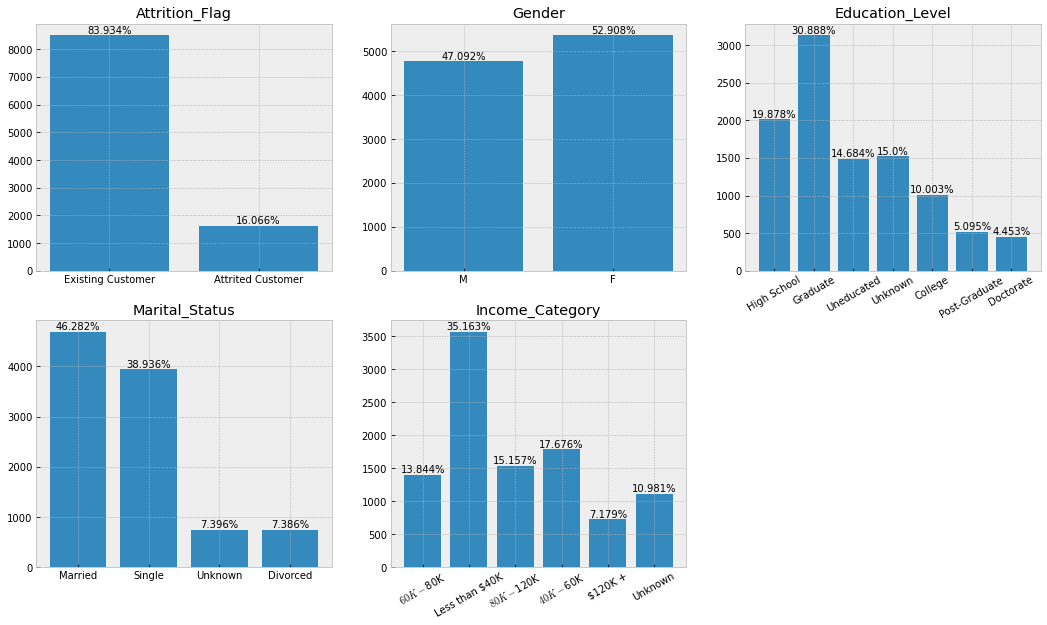

In [12]:
# not really needed, only because these random seed make the generated figure looks nicer
cat_plots = plot_all(df, categorical_vars)

The other columns contains numerical values

In [13]:
num_vals = []
for item in df.columns:
    if item not in categorical_vars:
        num_vals.append(item)
print("Numerical Variables: " + str(num_vals))

Numerical Variables: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [14]:
def plot_all_num(df, num_names, l = 4,  fsize = (18, 15)):
    h = len(num_names) // l if len(num_names) % l == 0 else len(num_names) // l + 1
    f, ax = plt.subplots(h, l, figsize = fsize)
    for i in range(h):
        for j in range(l):
            idx = i * l + j
            if idx >= len(num_names):
                break
            num_name = num_names[idx]
            cnt = collections.Counter(df[num_name])
            key_num = len(cnt)
            ax[i][j].hist(df[num_name], bins = min(50, key_num))
            ax[i][j].set_title(num_names[idx])
    return f

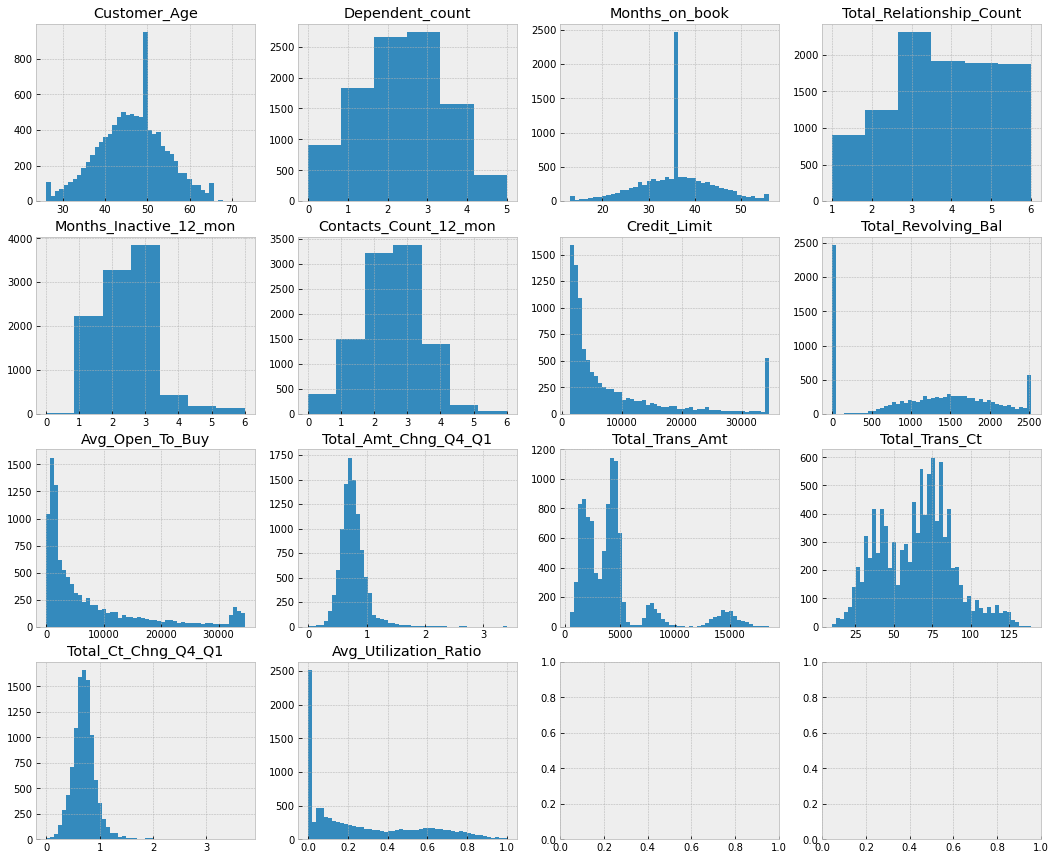

In [15]:
num_plots = plot_all_num(df, num_vals)

In [16]:
corrs = df.loc[: ,num_vals].corr().abs()
print(corrs)

                          Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000         0.122254        0.788912   
Dependent_count               0.122254         1.000000        0.103062   
Months_on_book                0.788912         0.103062        1.000000   
Total_Relationship_Count      0.010931         0.039076        0.009203   
Months_Inactive_12_mon        0.054361         0.010768        0.074164   
Contacts_Count_12_mon         0.018452         0.040505        0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780         0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1          0.062042         0.035439        0.048959   
Total_Trans_Amt               0.046446         0.025046        0.038591   
Total_Trans_Ct                0.067097         0.049912        0.049819   
Total_Ct_Chng_Q4_Q1      

Seaborn is the best way to draw heatmap.
You can draw density plot and bar plots by seaborn as well.

<AxesSubplot:>

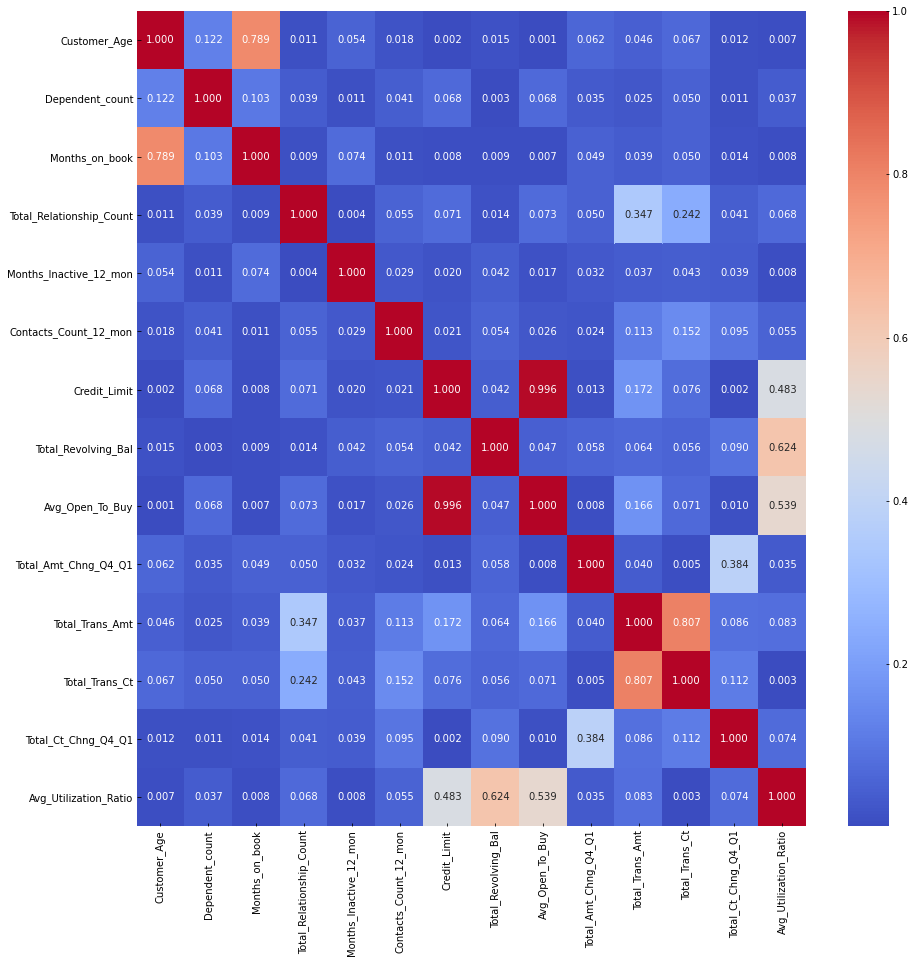

In [17]:
import seaborn as sns
plt.figure(figsize = (15, 15))
sns.heatmap(corrs, annot = True, fmt = '.3f', cmap = 'coolwarm')

Let's print out the pairs of variables which have too high correlation coefficient(corr > 0.9)

In [18]:
relation_dict = dict()
for colname in corrs.columns:
    for rowname in corrs.index:
        pair = tuple(sorted([colname, rowname]))
        if pair not in relation_dict and corrs[colname][rowname] > 0.9 and colname != rowname:
            relation_dict[pair] = corrs[colname][rowname]
for key, val in relation_dict.items():
    print(str(key) + ':' + str(val))

('Avg_Open_To_Buy', 'Credit_Limit'):0.995980543932013


Now we only have two valiables which has high correlation coefficient

We have to determine which to remove to avoid multicollinearity

In [19]:
import statistics as st

In [20]:
corrs_avg_to_buy = corrs["Avg_Open_To_Buy"]
corrs_credit_limit = corrs["Credit_Limit"]
mean_avg_to_buy = st.mean(corrs_avg_to_buy)
mean_credit_limit = st.mean(corrs_credit_limit)
mid_avg_to_buy = st.median(corrs_avg_to_buy)
mid_credit_limit = st.median(corrs_credit_limit)
print("Mean of correlations in variable Avg_Open_To_Buy: " + str(mean_avg_to_buy))
print("Mean of correlations in variable Credit_Limit: " + str(mean_credit_limit)) 
print("Median of correlations in variable Avg_Open_To_Buy" + str(mid_avg_to_buy))
print("Median of correlations in variable Credit_Limit:" + str(mid_credit_limit))

Mean of correlations in variable Avg_Open_To_Buy: 0.21624720702917263
Mean of correlations in variable Credit_Limit: 0.21246943772747823
Median of correlations in variable Avg_Open_To_Buy0.057729215908935774
Median of correlations in variable Credit_Limit:0.055278603776214005


Simply drop Avg_Open_To_Buy according to the mean and medium of its correlation coefficients and the maximum correlation coefficient from the heat map.

In [21]:
df.drop("Avg_Open_To_Buy", inplace = True, axis = 1)
print("The shape of current dataset:")
print(df.shape)

The shape of current dataset:
(10127, 19)


## 2.2 Explore Relationships

We are also interested in customer and non-customer in categorical values.

One example of our interest is:
if this person in our dataset is a male, what is the probability of him already become our customer?

In [22]:
def plot_in_cats(dt, cat_names, to_explore, l = 3, figsize = (20, 15)):
    # prevent from modifying original list.bool
    cat_vals = cat_names[:]
    # you cannot compare yourself with yourself
    if to_explore in cat_vals:
        cat_vals.remove(to_explore)
    h = len(cat_vals) // l if len(cat_vals) % l == 0 else len(cat_vals) // l + 1
    f, a = plt.subplots(h, l, figsize = figsize)
    plt.rc('font', size=7)
    for i in range(h):
        for j in range(l):
            idx = i * l + j
            if idx >= len(cat_vals):           
                break
            cat_name = cat_vals[idx]
            ax = sns.countplot(cat_name, data = dt, hue = to_explore, ax = a[i][j])
            cat_strs = set(dt[cat_name].values)
            for item in cat_strs:
                if len(item) * len(cat_strs) > 50:
                    ax.tick_params(axis='x', rotation=30)
                    break
            for c in ax.containers:
                # a bit of hard for beginner to understand, open debug window, put a breakpoint in this line and explore the object. You have to know what is class and object in programming language first
                s = sum([p.get_height() for p in c.patches])
                for p in c.patches:
                    h = p.get_height()
                    x = p.get_x()
                    w = p.get_width()
                    # h/s is the percentage. for example, 42.84% customers are males and 52.16% of customers are female
                    ax.text(x + w / 2 , h, str(round(h/s * 100, 3)) + "%", ha = "center")
    for extra in range(j, l):
        f.delaxes(a[i][extra])
    # we cannot return f here because seaborn will draw extra plot in notebook if you do it
    # use matplotlib if it not spends too much time for you in coding, seaborn sometimes cause some unpredictable problems(but not bugs).

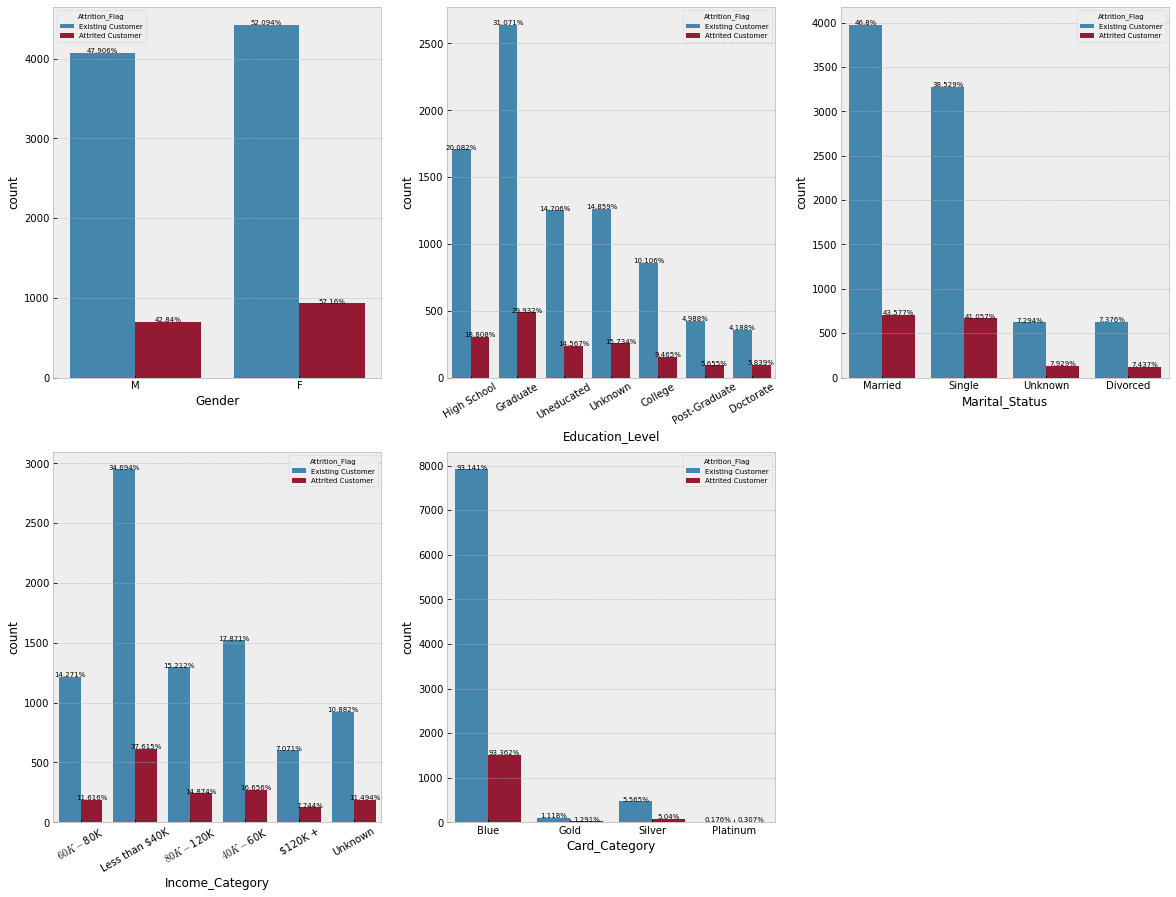

In [23]:
plot_in_cats(df, categorical_vars, "Attrition_Flag")

## 2.3 Feature Engineering

From the plots drawn by function cat_plots, we can see that some of the categorical variables could be converted to binary variables

In [24]:
bins = []
for cat in categorical_vars:
    s = set(df[cat].values)
    if len(s) == 2:
        bins.append(cat)
print(bins)

['Attrition_Flag', 'Gender']


The other categorical variables could be converted to dummy variables

In [25]:
dummies = [cat for cat in categorical_vars if cat not in bins]
print(dummies)

['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
